In [31]:
import pennylane as qml
from gate_opt_utils_2 import *
from quantum_circuit_optimization import *
import matplotlib.pyplot as plt

In [2]:
[ds] = qml.data.load("ketgpt")

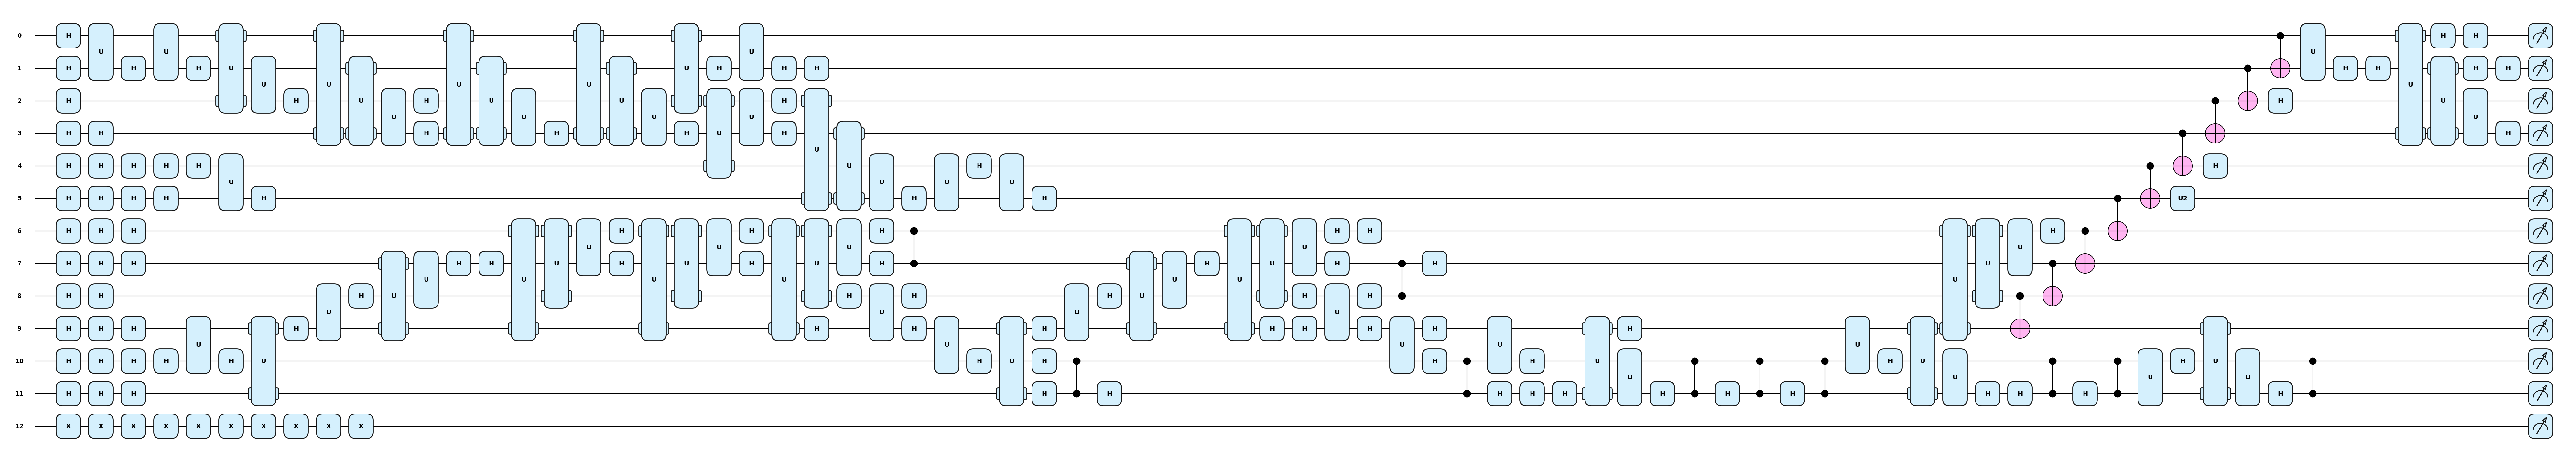

               0
num_qubit     13
num_gate     199
num_1q_gate  116
num_2q_gate   19
unitary       64
depth         66
None


In [32]:
seed = 0

@qml.qnode(qml.device('default.qubit'))
def circuit(): # 0 to 99
    for op in ds.circuits[seed]:
        qml.apply(op)
    return qml.state()

fig, axs = qml.draw_mpl(circuit, style='pennylane')()
plt.show()

print(summary_penny(circuit))

In [33]:
qnode = remove_barrier(circuit)

0 barriers are removed


In [34]:
reduced_ds, qnode_q2 = optimization_lev_2(ds, circuit, seed=0)

               0
num_qubit     12
num_gate     145
num_1q_gate   62
num_2q_gate   19
unitary       64
depth         67
None


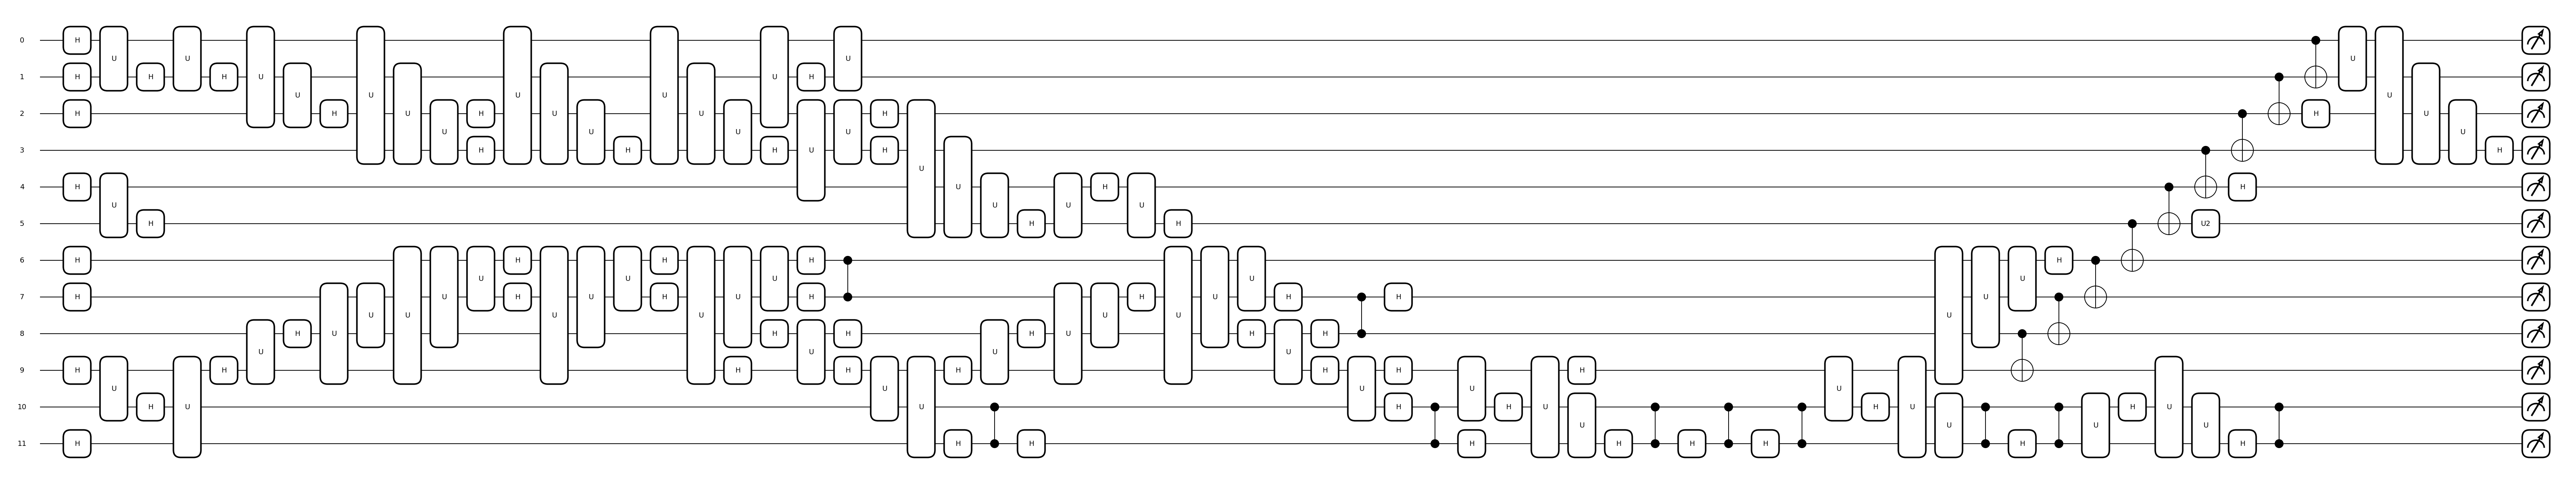

In [35]:
qnode_q1 = optimization_lev_1(reduced_ds, qnode_q2, seed=0)